# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


     

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ahipara
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | kuche
City not found. Skipping...
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | hermiston
Processing Record 8 of Set 1 | iracoubo
Processing Record 9 of Set 1 | davila
Processing Record 10 of Set 1 | sept-iles
Processing Record 11 of Set 1 | wajir
Processing Record 12 of Set 1 | benguela
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | palauig
Processing Record 15 of Set 1 | babanka
Processing Record 16 of Set 1 | mykhaylivka
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | svetlyy
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | flinders
Processing Record 21 of Set 1 | malia
Processing Record 22 of Set 1 | tuktoy

Processing Record 33 of Set 4 | tarrega
Processing Record 34 of Set 4 | bredasdorp
Processing Record 35 of Set 4 | zaporizhzhya
Processing Record 36 of Set 4 | mar del plata
Processing Record 37 of Set 4 | hovd
Processing Record 38 of Set 4 | vanimo
Processing Record 39 of Set 4 | fort nelson
Processing Record 40 of Set 4 | falkenberg
Processing Record 41 of Set 4 | prainha
Processing Record 42 of Set 4 | alofi
Processing Record 43 of Set 4 | ulladulla
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | nizwa
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | abu jubayhah
City not found. Skipping...
Processing Record 49 of Set 4 | romodanovo
Processing Record 50 of Set 4 | la massana
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | saint anthony
Processing Record 3 of Set 5 | kapaa
Processing Record 4 of Set 5 | tiksi
Processing Record 5 of Set 5 | lorengau
Processing Recor

Processing Record 21 of Set 8 | agadez
Processing Record 22 of Set 8 | port lincoln
Processing Record 23 of Set 8 | gaoua
Processing Record 24 of Set 8 | hofn
Processing Record 25 of Set 8 | lagos
Processing Record 26 of Set 8 | airai
Processing Record 27 of Set 8 | marathon
Processing Record 28 of Set 8 | labuhan
Processing Record 29 of Set 8 | inndyr
Processing Record 30 of Set 8 | cortes
Processing Record 31 of Set 8 | nouadhibou
Processing Record 32 of Set 8 | comodoro rivadavia
Processing Record 33 of Set 8 | chaah
Processing Record 34 of Set 8 | jibuti
Processing Record 35 of Set 8 | dalby
Processing Record 36 of Set 8 | matehuala
Processing Record 37 of Set 8 | mudkhed
Processing Record 38 of Set 8 | buchanan
Processing Record 39 of Set 8 | itoman
Processing Record 40 of Set 8 | vanavara
Processing Record 41 of Set 8 | blackwater
Processing Record 42 of Set 8 | zheleznodorozhnyy
Processing Record 43 of Set 8 | sorvag
City not found. Skipping...
Processing Record 44 of Set 8 | ta

Processing Record 13 of Set 12 | nabire
Processing Record 14 of Set 12 | verkhoyansk
Processing Record 15 of Set 12 | neiafu
Processing Record 16 of Set 12 | port blair
Processing Record 17 of Set 12 | portland
Processing Record 18 of Set 12 | derzhavinsk
Processing Record 19 of Set 12 | weyburn
Processing Record 20 of Set 12 | wenling
Processing Record 21 of Set 12 | katsuura
Processing Record 22 of Set 12 | menongue
Processing Record 23 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 24 of Set 12 | bilma
Processing Record 25 of Set 12 | samarai
Processing Record 26 of Set 12 | yatou
Processing Record 27 of Set 12 | narsaq
Processing Record 28 of Set 12 | usoke
Processing Record 29 of Set 12 | fujin
Processing Record 30 of Set 12 | kropotkin
Processing Record 31 of Set 12 | manono
Processing Record 32 of Set 12 | kushima
Processing Record 33 of Set 12 | seekirchen
City not found. Skipping...
Processing Record 34 of Set 12 | pangkalanbuun
Processing Record 35 of Set 12 | saint-

In [4]:

# Create the dataframe from the lists we generated from last cell
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ahipara,-35.1667,173.1667,19.58,59,0,2.21,NZ,2022-12-05 00:06:32
1,Rikitea,-23.1203,-134.9692,24.13,81,79,5.83,PF,2022-12-05 00:04:00
2,Souillac,-20.5167,57.5167,24.21,78,20,3.09,MU,2022-12-05 00:00:29
3,Hamilton,39.1834,-84.5333,2.47,54,0,1.54,US,2022-12-05 00:06:32
4,Yellowknife,62.4560,-114.3525,-20.71,65,75,4.63,CA,2022-12-05 00:00:30
5,Hermiston,45.8404,-119.2895,-1.99,91,100,0.00,US,2022-12-05 00:06:33
6,Iracoubo,5.4802,-53.2011,24.43,88,99,1.72,GF,2022-12-05 00:06:33
7,Davila,18.4726,120.5763,26.95,78,25,7.62,PH,2022-12-05 00:06:34
8,Sept-Iles,50.2001,-66.3821,-10.94,79,17,4.98,CA,2022-12-05 00:05:27
9,Wajir,1.7471,40.0573,25.57,66,59,4.34,KE,2022-12-05 00:06:34


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ahipara,-35.1667,173.1667,19.58,59,0,2.21,NZ,2022-12-05 00:06:32
1,Rikitea,-23.1203,-134.9692,24.13,81,79,5.83,PF,2022-12-05 00:04:00
2,Souillac,-20.5167,57.5167,24.21,78,20,3.09,MU,2022-12-05 00:00:29
3,Hamilton,39.1834,-84.5333,2.47,54,0,1.54,US,2022-12-05 00:06:32
4,Yellowknife,62.4560,-114.3525,-20.71,65,75,4.63,CA,2022-12-05 00:00:30


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ahipara,-35.1667,173.1667,19.58,59,0,2.21,NZ,2022-12-05 00:06:32
1,Rikitea,-23.1203,-134.9692,24.13,81,79,5.83,PF,2022-12-05 00:04:00
2,Souillac,-20.5167,57.5167,24.21,78,20,3.09,MU,2022-12-05 00:00:29
3,Hamilton,39.1834,-84.5333,2.47,54,0,1.54,US,2022-12-05 00:06:32
4,Yellowknife,62.4560,-114.3525,-20.71,65,75,4.63,CA,2022-12-05 00:00:30


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

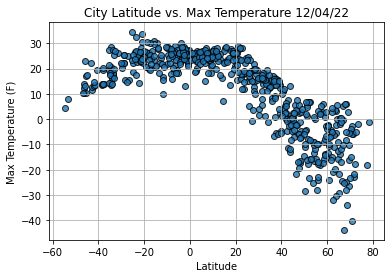

In [10]:
# Build scatter plot for latitude vs. temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

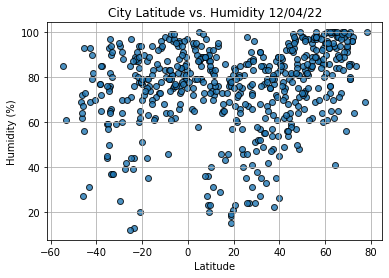

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

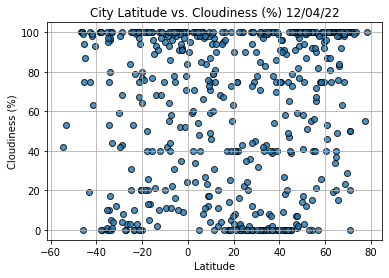

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

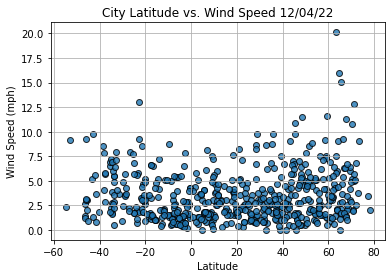

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13


     

City                      Babanka
Lat                       48.7097
Lng                       30.4483
Max Temp                    -4.78
Humidity                       48
Cloudiness                     97
Wind Speed                    4.6
Country                        UA
Date          2022-12-05 00:06:35
Name: 13, dtype: object

In [16]:

# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Hamilton,39.1834,-84.5333,2.47,54,0,1.54,US,2022-12-05 00:06:32
4,Yellowknife,62.4560,-114.3525,-20.71,65,75,4.63,CA,2022-12-05 00:00:30
5,Hermiston,45.8404,-119.2895,-1.99,91,100,0.00,US,2022-12-05 00:06:33
6,Iracoubo,5.4802,-53.2011,24.43,88,99,1.72,GF,2022-12-05 00:06:33
7,Davila,18.4726,120.5763,26.95,78,25,7.62,PH,2022-12-05 00:06:34


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Hamilton,39.1834,-84.5333,2.47,54,0,1.54,US,2022-12-05 00:06:32
4,Yellowknife,62.4560,-114.3525,-20.71,65,75,4.63,CA,2022-12-05 00:00:30
5,Hermiston,45.8404,-119.2895,-1.99,91,100,0.00,US,2022-12-05 00:06:33
6,Iracoubo,5.4802,-53.2011,24.43,88,99,1.72,GF,2022-12-05 00:06:33
7,Davila,18.4726,120.5763,26.95,78,25,7.62,PH,2022-12-05 00:06:34


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ahipara,-35.1667,173.1667,19.58,59,0,2.21,NZ,2022-12-05 00:06:32
1,Rikitea,-23.1203,-134.9692,24.13,81,79,5.83,PF,2022-12-05 00:04:00
2,Souillac,-20.5167,57.5167,24.21,78,20,3.09,MU,2022-12-05 00:00:29
10,Benguela,-12.5763,13.4055,24.33,84,100,0.64,AO,2022-12-05 00:06:34
17,Flinders,-34.5833,150.8552,28.47,50,10,3.87,AU,2022-12-05 00:06:09


###  Temperature vs. Latitude Linear Regression Plot

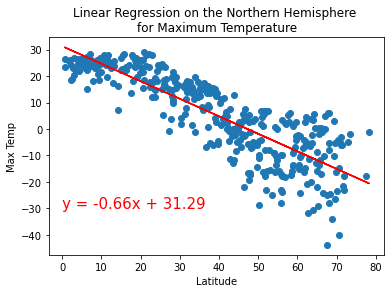

In [23]:
# Linear regression on Northern Hemisphere

# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(0,-30))


    

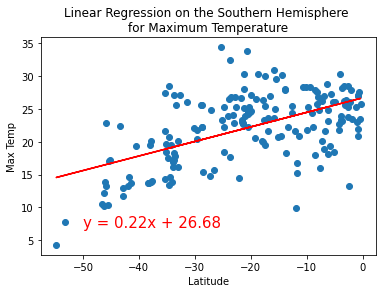

In [27]:
# Linear regression on Southern Hemisphere
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,7))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

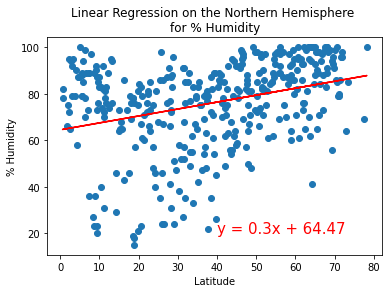

In [28]:
# Northern Hemisphere
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,20))



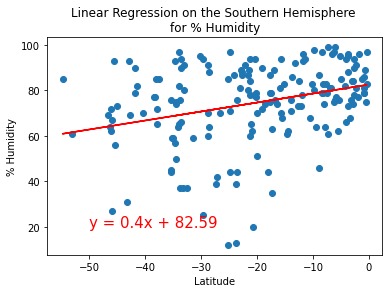

In [29]:
# Southern Hemisphere
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,20))



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

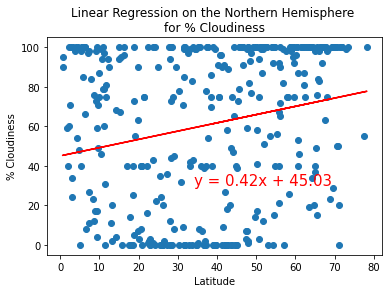

In [31]:
# Northern Hemisphere

# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(34,30))


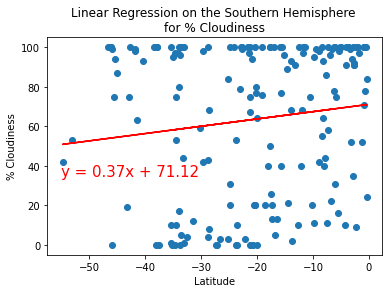

In [33]:
# Southern Hemisphere
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,35))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

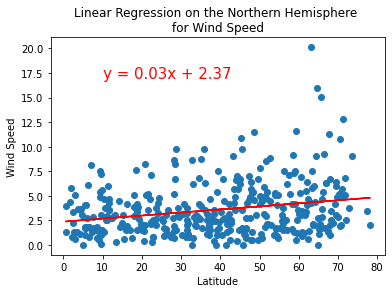

In [38]:
# Northern Hemisphere
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,17))


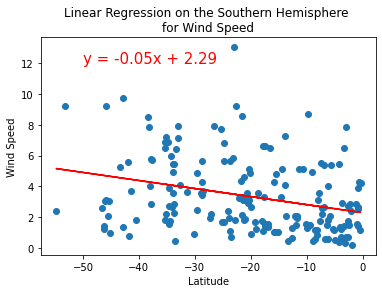

In [40]:
# Southern Hemisphere
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,12))



**Discussion about the linear relationship:** YOUR RESPONSE HERE